<a href="https://colab.research.google.com/github/Susreesha/ML/blob/main/Dashboard3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_excel('/content/Healthcare_Attrition_Dataset.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               1001 non-null   int64  
 1   Age                       999 non-null    object 
 2   Gender                    999 non-null    object 
 3   Education Level           1001 non-null   object 
 4   Job Role/Title            1001 non-null   object 
 5   Department                999 non-null    object 
 6   Years of Experience       998 non-null    float64
 7   Tenure with Organization  999 non-null    float64
 8   Work Schedule             1001 non-null   object 
 9   Salary                    1000 non-null   float64
 10  Job Satisfaction Level    1001 non-null   object 
 11  Patient Load per day      999 non-null    float64
 12  Attrition                 999 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 101.8+ KB


In [ ]:
df.drop_duplicates('Employee ID')

,Employee ID,Age,Gender,Education Level,Job Role/Title,Department,Years of Experience,Tenure with Organization,Work Schedule,Salary,Job Satisfaction Level,Patient Load per day,Attrition
0,160853,44,Male,High School,Technician,Neurology,25.0,16.0,Day shift,143815.0,Low,21.0,1.0
1,522167,50,Other,High School,Therapist,Cardiology,28.0,17.0,Night shift,139603.0,Low,20.0,1.0
3,652703,60,Other,High School,Nurse,Neurology,NaN,13.0,Rotating shift,58104.0,Moderate,12.0,0.0
4,870174,61,M,High School,Administrator,Emergency,39.0,17.0,Rotating shift,NaN,High,13.0,1.0
5,685442,47,female,Bachelor's,Nurse,Neurology,16.0,1.0,Day shift,83990.0,Moderate,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,873167,46,Other,Master's,Administrator,Neurology,12.0,10.0,Rotating shift,143659.0,Moderate,12.0,1.0
997,495138,59,Other,PhD,Nurse,Cardiology,18.0,19.0,Night shift,56167.0,Low,26.0,1.0
998,300084,30,Other,Master's,Nurse,Neurology,28.0,9.0,Day shift,84846.0,Moderate,21.0,0.0
999,771576,33,Female,PhD,Administrator,Oncology,14.0,1.0,Night shift,38601.0,High,20.0,0.0


In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.dtypes

,0
Employee_ID,int64
Age,object
Gender,object
Education_Level,object
Job_Role/Title,object
Department,object
Years_of_Experience,float64
Tenure_with_Organization,float64
Work_Schedule,object
Salary,float64


In [ ]:
for i in df.select_dtypes(include=['object']).columns:
  print(df[i].unique())

[44 50 60 61 47 36 nan 62 37 42 46 38 52 'sixty two' 58 48 56 500 23 65 43
 53 64 28 55 33 54 63 49 31 25 34 39 45 24 26 30 35 22 41 59 51 32 29 40
 27 57]
['Male' 'Other' 'M' 'female' 'Female' 'm' nan]
['High School' "Bachelor's" 'PhD' "Master's"]
['Technician' 'Therapist' 'Nurse' 'Administrator' 'Doctor']
['Neurology' 'Cardiology' 'Emergency' 'Oncology' nan 'Pediatrics']
['Day shift' 'Night shift' 'Rotating shift']
['Low' 'Moderate' 'High']


In [ ]:
df['Age'] = df['Age'].replace({'sixty two': '62'})

In [ ]:
df['Gender'] = df['Gender'].replace({'M': 'Male', 'm':'Male', 'female':'Female', 'Other':'Male'})

In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [ ]:
df.iloc[17,:]

,17
Employee_ID,319857
Age,62.0
Gender,Female
Education_Level,Bachelor's
Job_Role/Title,Technician
Department,Emergency
Years_of_Experience,18.0
Tenure_with_Organization,11.0
Work_Schedule,Day shift
Salary,136330.0


In [ ]:
import numpy as np
for i in df.select_dtypes(include=np.number).columns[:-1]:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,1
Education_Level,0
Job_Role/Title,0
Department,1
Years_of_Experience,0
Tenure_with_Organization,0
Work_Schedule,0
Salary,0


In [ ]:
for i in df.select_dtypes(include=np.number).columns[:-1]:
  df[i].fillna(df[i].mean(), inplace = True)

<ipython-input-332-3645eb6eae04>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace = True)


In [ ]:
for i in df.select_dtypes(include='object').columns[:-1]:
  df[i].fillna(df[i].mode()[0], inplace = True)

<ipython-input-333-1d845b6b3ab7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace = True)


In [ ]:
df = df.dropna(subset=['Attrition'])

In [ ]:
df = pd.get_dummies(df,columns=['Gender', 'Education_Level', 'Job_Role/Title', 'Department', 'Work_Schedule', 'Job_Satisfaction_Level'])

In [ ]:
df.head()

,Employee_ID,Age,Years_of_Experience,Tenure_with_Organization,Salary,Patient_Load_per_day,Attrition,Gender_Female,Gender_Male,Education_Level_Bachelor's,...,Department_Emergency,Department_Neurology,Department_Oncology,Department_Pediatrics,Work_Schedule_Day shift,Work_Schedule_Night shift,Work_Schedule_Rotating shift,Job_Satisfaction_Level_High,Job_Satisfaction_Level_Low,Job_Satisfaction_Level_Moderate
0,160853,44.0,25.0,16.0,143815.0,21.0,1.0,False,True,False,...,False,True,False,False,True,False,False,False,True,False
1,522167,50.0,28.0,17.0,139603.0,20.0,1.0,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,522167,50.0,28.0,17.0,139603.0,20.0,1.0,False,True,False,...,False,False,False,False,False,True,False,False,True,False
5,685442,47.0,16.0,1.0,83990.0,25.0,0.0,True,False,True,...,False,True,False,False,True,False,False,False,False,True
8,934169,62.0,25.0,9.0,128302.0,21.0,1.0,False,True,False,...,False,False,True,False,False,True,False,False,True,False


In [ ]:
min_max_values = {}

for i in df.select_dtypes(include = np.number).columns[:-1]:
  min_value = df[i].min()
  max_value = df[i].max()
  df[i] = (df[i] - min_value) / (max_value - min_value)
  min_max_values[i] = (min_value, max_value)

In [ ]:
min_max_values

{'Employee_ID': (100397, 999976),
 'Age': (22.0, 65.0),
 'Years_of_Experience': (1.0, 40.0),
 'Tenure_with_Organization': (1.0, 20.0),
 'Salary': (30062.0, 149984.0),
 'Patient_Load_per_day': (10.0, 30.0)}

In [ ]:
import json
with open('min_max_values.json', 'w') as json_file:
  json.dump(min_max_values, json_file)

In [ ]:
df.corr()

,Employee_ID,Age,Years_of_Experience,Tenure_with_Organization,Salary,Patient_Load_per_day,Attrition,Gender_Female,Gender_Male,Education_Level_Bachelor's,...,Department_Emergency,Department_Neurology,Department_Oncology,Department_Pediatrics,Work_Schedule_Day shift,Work_Schedule_Night shift,Work_Schedule_Rotating shift,Job_Satisfaction_Level_High,Job_Satisfaction_Level_Low,Job_Satisfaction_Level_Moderate
Employee_ID,1.000000,-0.004358,-0.042272,0.058788,0.031694,-0.007157,-0.031601,0.009291,-0.009291,-0.011761,...,0.001922,-0.051652,0.075834,-0.007606,0.037482,-0.055252,0.018035,-0.012070,0.040324,-0.028489
Age,-0.004358,1.000000,-0.028911,0.022460,-0.007214,0.034952,-0.103849,0.070850,-0.070850,0.058636,...,-0.001431,-0.051870,0.005816,0.003373,0.001543,-0.017349,0.015874,0.027718,-0.030955,0.003403
Years_of_Experience,-0.042272,-0.028911,1.000000,0.021468,0.005181,-0.037982,-0.005170,0.001074,-0.001074,-0.029638,...,0.001510,-0.022541,-0.043787,0.019703,0.049258,-0.027276,-0.021803,-0.040974,0.077450,-0.036911
Tenure_with_Organization,0.058788,0.022460,0.021468,1.000000,-0.022057,-0.028206,0.030277,0.004144,-0.004144,-0.045074,...,-0.021207,-0.001447,-0.002155,0.015217,0.040330,-0.013790,-0.026426,-0.009990,0.010089,-0.000153
Salary,0.031694,-0.007214,0.005181,-0.022057,1.000000,0.019924,0.016846,-0.048690,0.048690,-0.047474,...,0.054822,-0.025018,-0.051146,0.003321,0.004555,-0.035089,0.030672,-0.027487,0.049087,-0.021875
Patient_Load_per_day,-0.007157,0.034952,-0.037982,-0.028206,0.019924,1.000000,0.035582,0.032581,-0.032581,-0.007441,...,-0.049187,0.014199,0.021568,-0.018307,-0.006074,-0.004530,0.010611,-0.006205,-0.062660,0.069248
Attrition,-0.031601,-0.103849,-0.005170,0.030277,0.016846,0.035582,1.000000,-0.070788,0.070788,0.006796,...,0.004447,0.071405,-0.073705,0.005250,0.057686,-0.012276,-0.045276,-0.034700,-0.009985,0.044771
Gender_Female,0.009291,0.070850,0.001074,0.004144,-0.048690,0.032581,-0.070788,1.000000,-1.000000,0.008933,...,-0.025496,0.004830,0.052239,0.004624,-0.065185,0.063403,0.001444,-0.057318,-0.011797,0.069230
Gender_Male,-0.009291,-0.070850,-0.001074,-0.004144,0.048690,-0.032581,0.070788,-1.000000,1.000000,-0.008933,...,0.025496,-0.004830,-0.052239,-0.004624,0.065185,-0.063403,-0.001444,0.057318,0.011797,-0.069230
Education_Level_Bachelor's,-0.011761,0.058636,-0.029638,-0.045074,-0.047474,-0.007441,0.006796,0.008933,-0.008933,1.000000,...,0.019454,-0.040031,0.049948,-0.021121,-0.027432,-0.025083,0.052567,0.094923,-0.046686,-0.048029


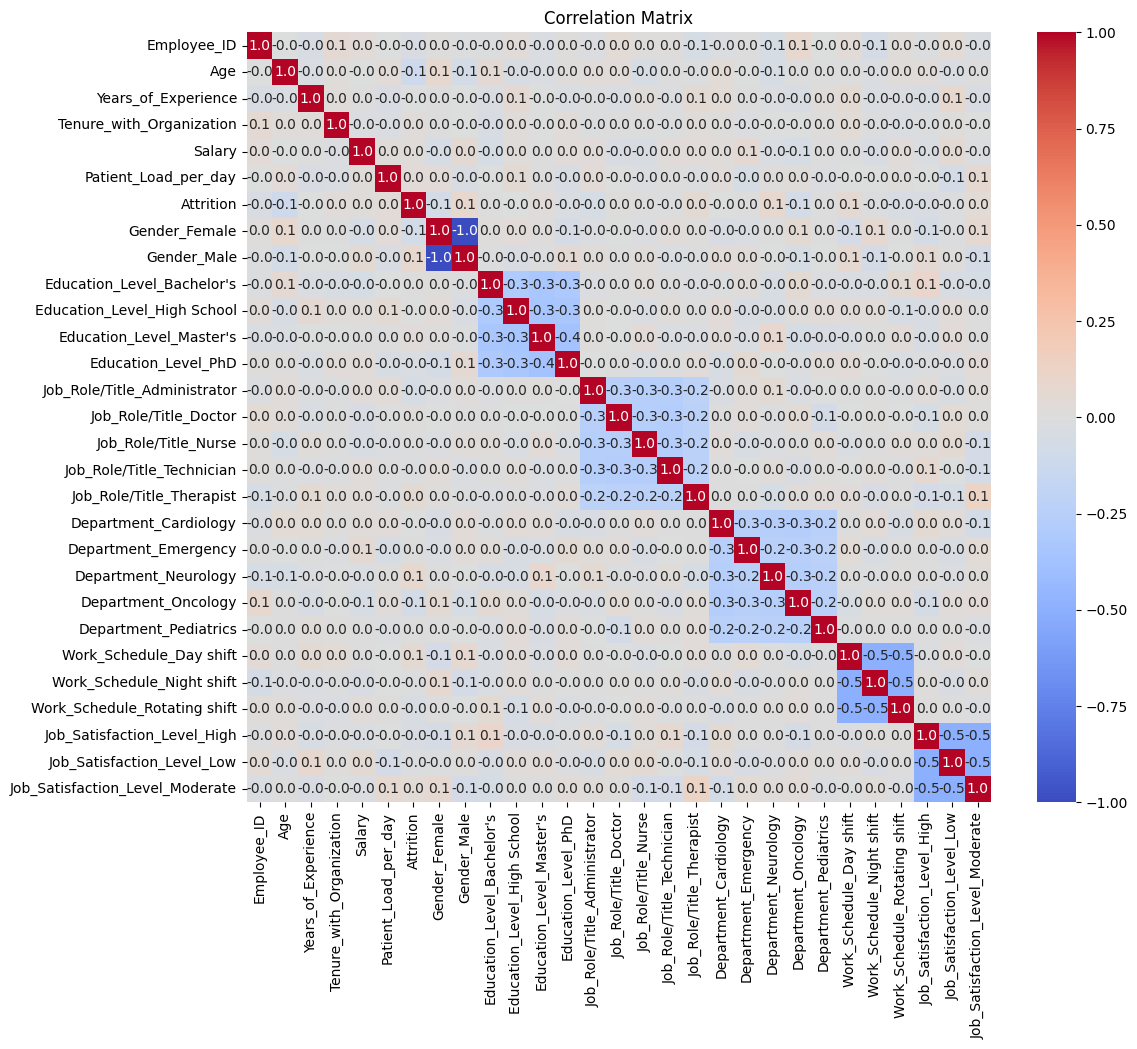

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
Correlation_matrix = df.corr()
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm',fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 1000
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Employee_ID                      990 non-null    float64
 1   Age                              990 non-null    float64
 2   Years_of_Experience              990 non-null    float64
 3   Tenure_with_Organization         990 non-null    float64
 4   Salary                           990 non-null    float64
 5   Patient_Load_per_day             990 non-null    float64
 6   Attrition                        990 non-null    float64
 7   Gender_Female                    990 non-null    bool   
 8   Gender_Male                      990 non-null    bool   
 9   Education_Level_Bachelor's       990 non-null    bool   
 10  Education_Level_High School      990 non-null    bool   
 11  Education_Level_Master's         990 non-null    bool   
 12  Education_Level_PhD       

In [ ]:
x = df.drop(columns = ["Attrition", "Gender_Male",  "Education_Level_High School", "Employee_ID", "Job_Role/Title_Doctor", "Department_Cardiology",
                       "Work_Schedule_Night shift", "Job_Satisfaction_Level_High",], axis = 1)
y = df["Attrition"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
y_train.value_counts()

,count
Attrition,
0.0,414
1.0,378


In [ ]:
# prompt: smote for xtrain

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


In [ ]:
y_train_smote.value_counts()

,count
Attrition,
0.0,414
1.0,414


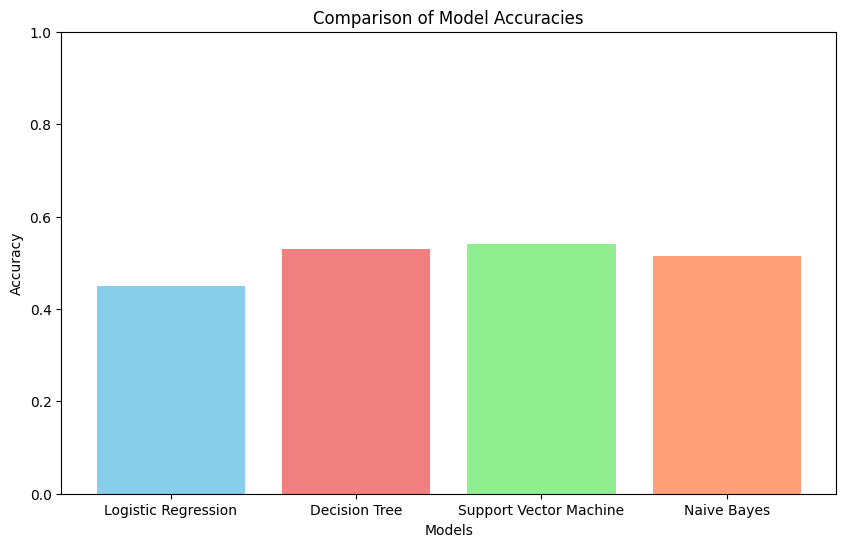

In [ ]:
# prompt: # prompt: generate  code for 'Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Naive Bayes' for getting comparision graph for every model.
# import matplotlib.pyplot as plt
# # Assuming 'models' is defined as in the previous code
# model_names = []
# accuracies = []
# for model_name, model in models:
#     model_names.append(model_name)
#     model.fit(x_train_smote, y_train_smote)
#     y_pred = model.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)
# # Create the comparison graph
# plt.figure(figsize=(10, 6))
# plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
# plt.xlabel("Models")
# plt.ylabel("Accuracy")
# plt.title("Comparison of Model Accuracies")
# plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
# plt.show()

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=0)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Create a list of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB())
]

model_names = []
accuracies = []
for model_name, model in models:
    model_names.append(model_name)
    model.fit(x_train_smote, y_train_smote)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create the comparison graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()


In [ ]:
# prompt: sequential feature selection for logistic regression, decision tree, SVM, Naive Bayes

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming x_train_smote, y_train_smote, x_test, y_test are defined from the previous code

# Create Sequential Feature Selector for Logistic Regression
sfs_lr = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction='forward') # Example: select top 5 features
sfs_lr.fit(x_train_smote, y_train_smote)

# Get selected features for Logistic Regression
selected_features_lr = list(x_train_smote.columns[sfs_lr.get_support()])

# Train and evaluate Logistic Regression with selected features
lr = LogisticRegression()
lr.fit(x_train_smote.loc[:, selected_features_lr], y_train_smote)
y_pred_lr = lr.predict(x_test.loc[:, selected_features_lr])
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy (Sequential Feature Selection): {accuracy_lr}")


# Repeat the process for other models: Decision Tree, SVM, Naive Bayes

#Decision Tree
sfs_dt = SequentialFeatureSelector(DecisionTreeClassifier(), n_features_to_select=5, direction='forward')
sfs_dt.fit(x_train_smote, y_train_smote)
selected_features_dt = list(x_train_smote.columns[sfs_dt.get_support()])
dt = DecisionTreeClassifier()
dt.fit(x_train_smote.loc[:, selected_features_dt], y_train_smote)
y_pred_dt = dt.predict(x_test.loc[:, selected_features_dt])
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy (Sequential Feature Selection): {accuracy_dt}")


#SVM
sfs_svm = SequentialFeatureSelector(SVC(), n_features_to_select=5, direction='forward')
sfs_svm.fit(x_train_smote, y_train_smote)
selected_features_svm = list(x_train_smote.columns[sfs_svm.get_support()])
svm = SVC()
svm.fit(x_train_smote.loc[:, selected_features_svm], y_train_smote)
y_pred_svm = svm.predict(x_test.loc[:, selected_features_svm])
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (Sequential Feature Selection): {accuracy_svm}")

#Naive Bayes
sfs_nb = SequentialFeatureSelector(GaussianNB(), n_features_to_select=5, direction='forward')
sfs_nb.fit(x_train_smote, y_train_smote)
selected_features_nb = list(x_train_smote.columns[sfs_nb.get_support()])
nb = GaussianNB()
nb.fit(x_train_smote.loc[:, selected_features_nb], y_train_smote)
y_pred_nb = nb.predict(x_test.loc[:, selected_features_nb])
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy (Sequential Feature Selection): {accuracy_nb}")


Logistic Regression Accuracy (Sequential Feature Selection): 0.5505050505050505
Decision Tree Accuracy (Sequential Feature Selection): 0.5
SVM Accuracy (Sequential Feature Selection): 0.5151515151515151
Naive Bayes Accuracy (Sequential Feature Selection): 0.51010101010101


In [ ]:
# prompt: recursive feature selection for logistic regression, decision tree, SVM, Naive Bayes

# Assuming x_train_smote, y_train_smote, x_test, y_test are defined from the previous code

# Create Sequential Feature Selector for Logistic Regression
sfs_lr = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction='forward') # Example: select top 5 features
sfs_lr.fit(x_train_smote, y_train_smote)

# Get selected features for Logistic Regression
selected_features_lr = list(x_train_smote.columns[sfs_lr.get_support()])

# Train and evaluate Logistic Regression with selected features
lr = LogisticRegression()
lr.fit(x_train_smote.loc[:, selected_features_lr], y_train_smote)
y_pred_lr = lr.predict(x_test.loc[:, selected_features_lr])
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy (Sequential Feature Selection): {accuracy_lr}")


# Repeat the process for other models: Decision Tree, SVM, Naive Bayes

#Decision Tree
sfs_dt = SequentialFeatureSelector(DecisionTreeClassifier(), n_features_to_select=5, direction='forward')
sfs_dt.fit(x_train_smote, y_train_smote)
selected_features_dt = list(x_train_smote.columns[sfs_dt.get_support()])
dt = DecisionTreeClassifier()
dt.fit(x_train_smote.loc[:, selected_features_dt], y_train_smote)
y_pred_dt = dt.predict(x_test.loc[:, selected_features_dt])
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy (Sequential Feature Selection): {accuracy_dt}")


#SVM
sfs_svm = SequentialFeatureSelector(SVC(), n_features_to_select=5, direction='forward')
sfs_svm.fit(x_train_smote, y_train_smote)
selected_features_svm = list(x_train_smote.columns[sfs_svm.get_support()])
svm = SVC()
svm.fit(x_train_smote.loc[:, selected_features_svm], y_train_smote)
y_pred_svm = svm.predict(x_test.loc[:, selected_features_svm])
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (Sequential Feature Selection): {accuracy_svm}")

#Naive Bayes
sfs_nb = SequentialFeatureSelector(GaussianNB(), n_features_to_select=5, direction='forward')
sfs_nb.fit(x_train_smote, y_train_smote)
selected_features_nb = list(x_train_smote.columns[sfs_nb.get_support()])
nb = GaussianNB()
nb.fit(x_train_smote.loc[:, selected_features_nb], y_train_smote)
y_pred_nb = nb.predict(x_test.loc[:, selected_features_nb])
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy (Sequential Feature Selection): {accuracy_nb}")


Logistic Regression Accuracy (Sequential Feature Selection): 0.5505050505050505
Decision Tree Accuracy (Sequential Feature Selection): 0.5
SVM Accuracy (Sequential Feature Selection): 0.5151515151515151
Naive Bayes Accuracy (Sequential Feature Selection): 0.51010101010101


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 1000
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Employee_ID                      989 non-null    float64
 1   Age                              989 non-null    float64
 2   Years_of_Experience              989 non-null    float64
 3   Tenure_with_Organization         989 non-null    float64
 4   Salary                           989 non-null    float64
 5   Patient_Load_per_day             989 non-null    float64
 6   Attrition                        989 non-null    float64
 7   Gender_Female                    989 non-null    bool   
 8   Gender_Male                      989 non-null    bool   
 9   Education_Level_Bachelor's       989 non-null    bool   
 10  Education_Level_High School      989 non-null    bool   
 11  Education_Level_Master's         989 non-null    bool   
 12  Education_Level_PhD       

In [ ]:
min_max_values

{'Employee_ID': (100397, 999976),
 'Age': (22.0, 65.0),
 'Years_of_Experience': (1.0, 40.0),
 'Tenure_with_Organization': (1.0, 20.0),
 'Salary': (30062.0, 149984.0),
 'Patient_Load_per_day': (10.0, 30.0)}

In [ ]:
streamlit_code = """
import streamlit as st
import joblib
import numpy as np
import json

#Load the trained model
model = joblib.load('logistic_regression_model.pk1')

#Streamlit App
st.title("Attrition Prediction")
st.write("Enter the input values for prediction.")

#Input fields for each feature
Age = st.number_input("Age", min_value=18, max_value=114, step=1, value=65)
Cholesterol = st.number_input("Cholesterol", min_value=18, max_value=114, step=1, value=65)
BMI = st.number_input("BMI", min_value=15.0, max_value=50.0, step=0.1, value=25.0)
Length_of_Surgery = st.number_input("Length of Surgery", min_value=1.0, max_value=15.0, step=1.0, value=5.0)
Blood_Pressure_Systolic = st.number_input("Blood Pressure Systolic", min_value=90.0, max_value=160.0, step=1.0, value=110.0)
Blood_Pressure_Diastolic = st.number_input("Blood Pressure Diastolic", min_value=60.0, max_value=110.0, step=1.0, value=80.0)
Hemoglobin_Level = st.number_input("Hemoglobin Level", min_value=8.0, max_value=190.0, step=0.1, value=10.0)

#Yes or No
Smoking_Status_No = st.selectbox("Smoker?", options=["No", "Yes"])== "No"

#Categorical fields
Gender_Female = st.selectbox("Gender", options=["Male", "Female"]) == "Female"

#Type of Surgery Selection
Type_of_Surgery = st.selectbox("Type of Surgery", options=["Gastrointestinal", "Orthopedic", "Neurological", "Urologic", "Cardiac"])
Type_of_Surgery_Cardiac = Type_of_Surgery == 'Cardiac'
Type_of_Surgery_Gastrointestinal = Type_of_Surgery == 'Gastrointestinal'
Type_of_Surgery_Neurological = Type_of_Surgery == 'Neurological'
Type_of_Surgery_Orthopedic = Type_of_Surgery == 'Orthopedic'
Type_of_Surgery_Urologic = Type_of_Surgery == 'Urologic'

#Normalization function
def min_max_scale(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

#Load Min-Max values from JSON
with open('min_max_values.json', 'r') as json_file:
    min_max_values = json.load(json_file)

#Normalize inputs
Age_norm = min_max_scale(Age, *min_max_values['Age'])
BMI_norm = min_max_scale(BMI, *min_max_values['BMI'])
Length_of_Surgery_norm = min_max_scale(Length_of_Surgery, *min_max_values['Length_of_Surgery'])
Blood_Pressure_Systolic_norm = min_max_scale(Blood_Pressure_Systolic, *min_max_values['Blood_Pressure_Systolic'])
Blood_Pressure_Diastolic_norm = min_max_scale(Blood_Pressure_Diastolic, *min_max_values['Blood_Pressure_Diastolic'])
Hemoglobin_Level_norm = min_max_scale(Hemoglobin_Level, *min_max_values['Hemoglobin_Level'])

#Prepare input data for prediction
input_data = np.array([
  Age_norm, BMI_norm, Length_of_Surgery_norm, Blood_Pressure_Systolic_norm, Blood_Pressure_Diastolic_norm, Hemoglobin_Level_norm, int(Smoking_Status_No),
  int(Gender_Female),int(Type_of_Surgery_Cardiac), int(Type_of_Surgery_Gastrointestinal), int(Type_of_Surgery_Neurological), int(Type_of_Surgery_Orthopedic), int(Type_of_Surgery_Urologic)
]).reshape(1, -1)

#Predict button
if st.button("Recovery Time"):
 prediction = model.predict(input_data)
 st.success(f"Recovery Time: {prediction[0]:,.2f}")

"""

#Save the code to a file
with open ('app.py', 'w') as f:
  f.write(streamlit_code)